<img src="../6-Classification/ReutersNews.png" width="1000">

# <span style="color:purple"> Week 6 - Classification
### <span style="color:purple">Reuters Newspaper</span>  
<span style="color:purple">-- File: Jingying (Jane) Bi Homework 6 <br>
-- Name: Jingying Bi <br>
-- UCID: 12174556 <br>
<br>
    
<span style="color:purple">**Research Problem:** <br>

    
<span style="color:purple">**Dataset:** <br>
<span style="color:purple"> In this assignment, there are 2017 Reuters News from Oct ~ Dec 2008. Each news on Reuters has a tag marked by the website. I utilize these tags to create three classes. Class *Economy* includes tags "private equity", "global market", and "company". Class *Entertainment* includes tags "art", "film", and "entertainment". Class *Environment* includes tag "environment". 2017 Reuters news have been divided into 1468 *Economy* news, 348 *Entertainment* news and 201 *Environment* news. <br>
    


In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

## <span style="color:purple">1.1 Artificial Dataset and Classifiers
<span style="color:purple">There are five data patterns, including <br>
* <span style="color:purple">random 
* <span style="color:purple">andSplit 
* <span style="color:purple">xorSplit 
* <span style="color:purple">targetSplit
* <span style="color:purple">multiBlobs <br>

<span style="color:purple">There is one parameter noise. Hence, I will choose two values for noise (0.2, 0.8) and use the five patterns to generate 9 distinct artificial datasets. 

### <span style="color:purple"> 1.1.1 Nine Data Patterns

In [4]:
noise_1 = 0.2
noise_2 = 0.8
dfTrain_1, dfTest_1 = lucem_illud.trainTestSplit(lucem_illud.random())

dfTrain_2, dfTest_2 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise_1))
dfTrain_3, dfTest_3 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise_2))

dfTrain_4, dfTest_4 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise_1)) 
dfTrain_5, dfTest_5 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise_2))

dfTrain_6, dfTest_6 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise_1))
dfTrain_7, dfTest_7 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise_2))

dfTrain_8, dfTest_8 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise_1))
dfTrain_9, dfTest_9 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise_2))


****************************** Random ****************************


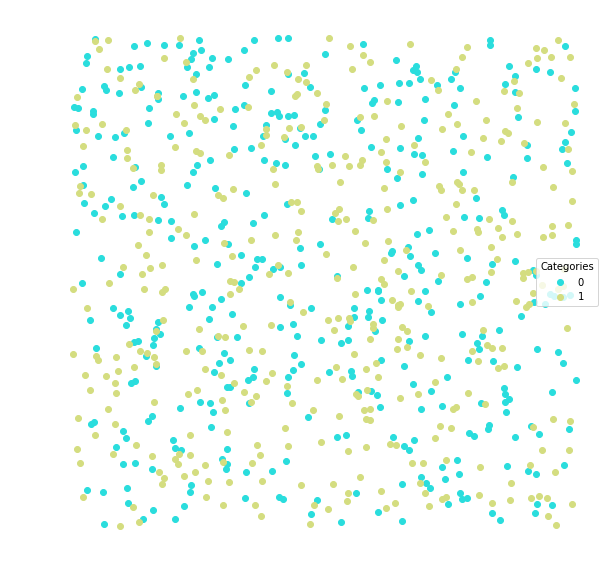

********************* andSplit, noise = 0.2  *********************


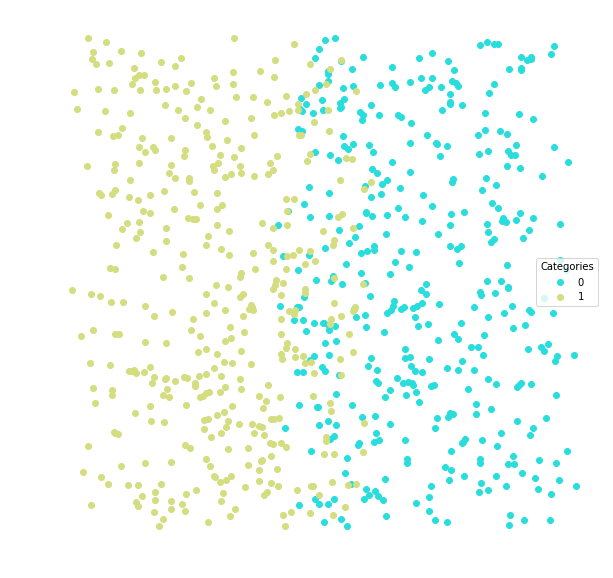

********************* andSplit, noise = 0.8  *********************


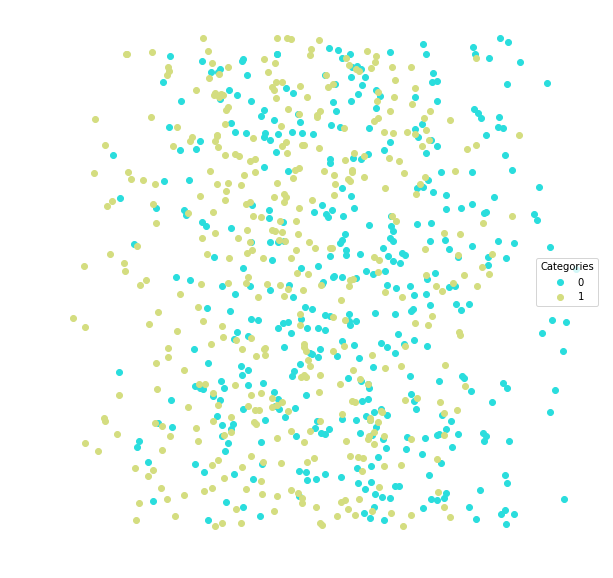

********************* xorSplit, noise = 0.2  *********************


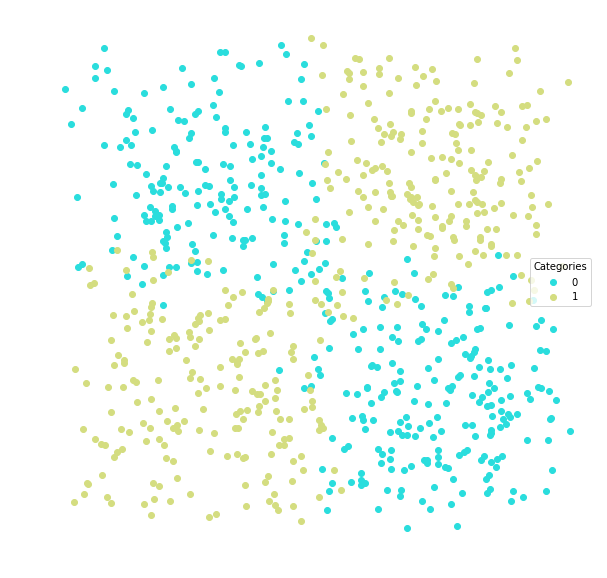

********************* xorSplit, noise = 0.8  *********************


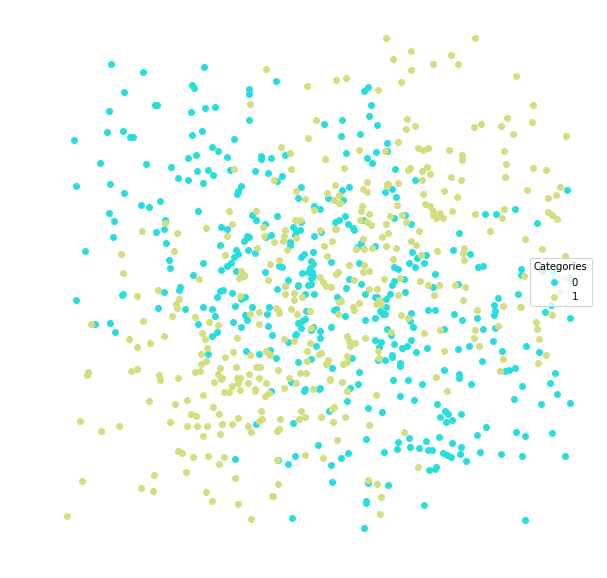

********************* targetSplit, noise = 0.2  *********************


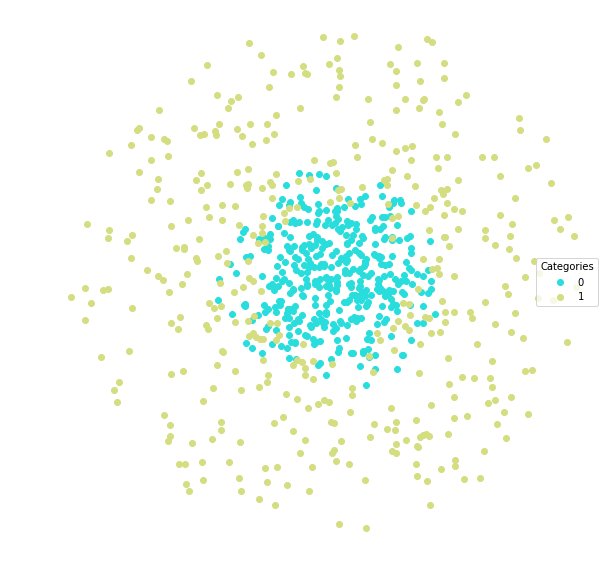

********************* targetSplit, noise = 0.8  *********************


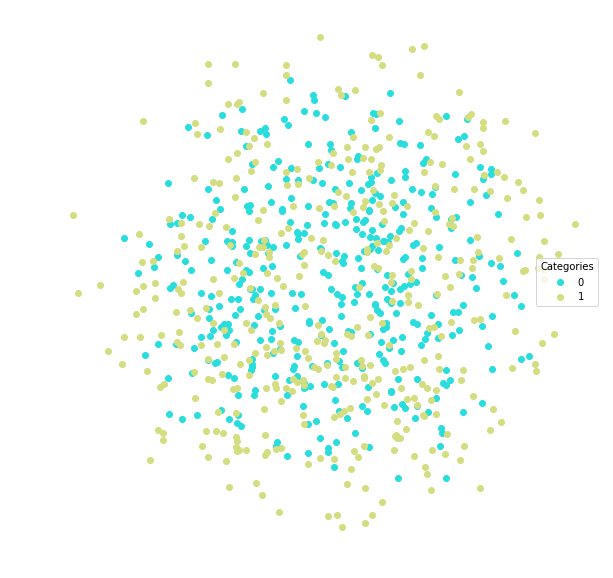

********************* multiBlobs, noise = 0.2  *********************


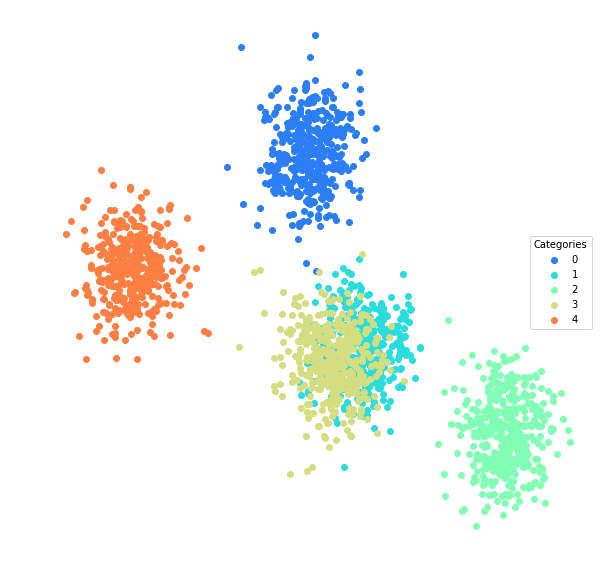

********************* multiBlobs, noise = 0.8  *********************


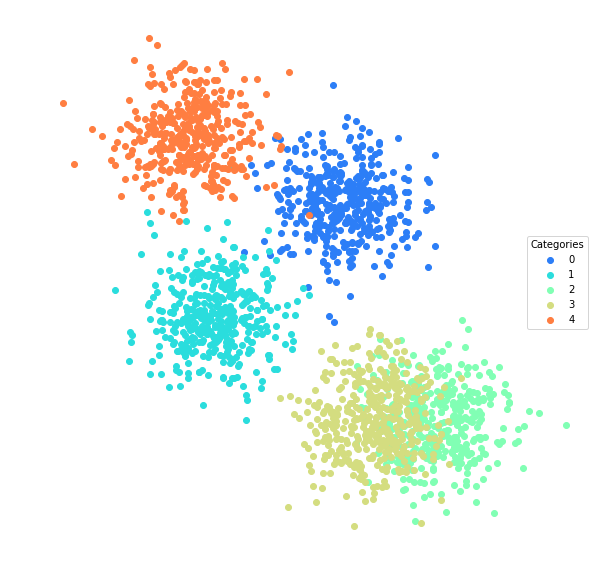

In [17]:
print('****************************** Random ****************************')
lucem_illud.plotter(dfTrain_1)

print('********************* andSplit, noise = 0.2  *********************')
lucem_illud.plotter(dfTrain_2)
print('********************* andSplit, noise = 0.8  *********************')
lucem_illud.plotter(dfTrain_3)

print('********************* xorSplit, noise = 0.2  *********************')
lucem_illud.plotter(dfTrain_4)
print('********************* xorSplit, noise = 0.8  *********************')
lucem_illud.plotter(dfTrain_5)

print('********************* targetSplit, noise = 0.2  *********************')
lucem_illud.plotter(dfTrain_6)
print('********************* targetSplit, noise = 0.8  *********************')
lucem_illud.plotter(dfTrain_7)

print('********************* multiBlobs, noise = 0.2  *********************')
lucem_illud.plotter(dfTrain_8)
print('********************* multiBlobs, noise = 0.8  *********************')
lucem_illud.plotter(dfTrain_9)

### <span style="color:purple"> 1.1.2 Train the Machine Learning Algorithm

In [21]:
#Bayes
clf_Bayes = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf_SVC_1 = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf_SVC_2 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf_K = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf_Reg = sklearn.linear_model.LogisticRegression()

#Symbolists
clf_DT = sklearn.tree.DecisionTreeClassifier()
clf_RF = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf_MLP = sklearn.neural_network.MLPClassifier()

#Ensemble
clf_Boosting = sklearn.ensemble.GradientBoostingClassifier()



### <span style="color:purple"> 1.1.3 Fit the Model and Train the Artificial Dataset
<span style="color:purple">I will choose patterns of andSplit, xorSplit, and MultiBlobs.<br>
I will apply clf_SVC_1, clf_Reg, clf_DT to train the model. <br>
Then I will use evaluateClassifier to evaluate the three models on the andSplit dataset <br>
Then I will use plotConfusionMatrix to evaluate the three models on the xorSplit dataset <br>
Then I will use plotMultiROC to evaluate the three models on the MultiBlobs dataset <br>

<span style="color:purple"> ** Interesting Question:** <br> 
<span style="color:purple">Which algorithm models which dataset patterns best? <br>

In [53]:
# andSplit + clf_SVC_1, 1
clf_SVC_1.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
# andSplit + clf_Reg
clf_Reg.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
# andSplit + clf_DT
clf_DT.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
# andSplit + Bayes
clf_Bayes.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
# ensembling
clf_Boosting.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])

# xorSplit + clf_SVC_1, 4
clf_SVC_1.fit(np.stack(dfTrain_4['vect'], axis=0), dfTrain_4['category'])
# xorSplit + clf_Reg
clf_Reg.fit(np.stack(dfTrain_4['vect'], axis=0), dfTrain_4['category'])
# xorSplit+ clf_D
clf_DT.fit(np.stack(dfTrain_4['vect'], axis=0), dfTrain_4['category'])
# xorSplit + Bayes
clf_Bayes.fit(np.stack(dfTrain_4['vect'], axis=0), dfTrain_4['category'])
# ensembling
clf_Boosting.fit(np.stack(dfTrain_4['vect'], axis=0), dfTrain_4['category'])


# MultiBlobs + clf_SVC_1, 8
clf_SVC_1.fit(np.stack(dfTrain_8['vect'], axis=0), dfTrain_8['category'])
# MultiBlobs + clf_Reg
clf_Reg.fit(np.stack(dfTrain_8['vect'], axis=0), dfTrain_8['category'])
# MultiBlobs + clf_DT
clf_DT.fit(np.stack(dfTrain_8['vect'], axis=0), dfTrain_8['category'])
# xorSplit + Bayes
clf_Bayes.fit(np.stack(dfTrain_8['vect'], axis=0), dfTrain_8['category'])
# ensembling
clf_Boosting.fit(np.stack(dfTrain_8['vect'], axis=0), dfTrain_8['category'])


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### <span style="color:purple">1.1.4 Evaluation

#### <span style="color:purple">Evaluate andSplit Dataset
<span style="color:purple"> LogisticRegression performs best.

In [35]:
print('************ andSplit: clf_SVC_1 **************')
lucem_illud.evaluateClassifier(clf_SVC_1, dfTest_2)

************ Random: clf_SVC_1 **************


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.54175,0.556631,0.48,0.678571,0.179245
1,0.40566,0.470000,0.57,0.000000,0.000000


In [36]:
print('************ andSplit: clf_Reg **************')
lucem_illud.evaluateClassifier(clf_Reg, dfTest_2)

************ Random: clf_Reg **************


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.563428,0.568329,0.45,0.642857,0.339623
1,0.563428,0.504551,0.45,0.513889,0.787234


In [37]:
print('************ andSplit: clf_DT **************')
lucem_illud.evaluateClassifier(clf_DT, dfTest_2)

************ Random: clf_DT **************


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.491871,0.526030,0.515,0.519481,0.377358
1,0.411080,0.447676,0.570,0.236842,0.095745


In [54]:
print('************ andSplit: clf_Bayes **************')
lucem_illud.evaluateClassifier(clf_Bayes, dfTest_2)

************ andSplit: clf_Bayes **************


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.475512,0.51897,0.540,0.479167,0.216981
1,0.495283,0.47000,0.475,0.000000,0.000000


In [55]:
print('************ andSplit: clf_Boosting **************')
lucem_illud.evaluateClassifier(clf_Boosting, dfTest_2)

************ andSplit: clf_Boosting **************


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.404055,0.498781,0.61,0.346154,0.169811
1,0.279004,0.438056,0.71,0.136364,0.095745


#### <span style="color:purple"> Evaluate xorSplit Dataset


************ xorSplit: clf_SVC_1 **************


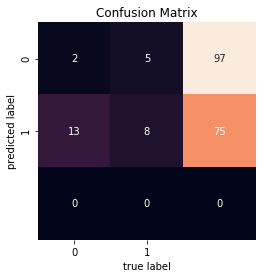

In [56]:
print('************ xorSplit: clf_SVC_1 **************')
lucem_illud.plotConfusionMatrix(clf_SVC_1, dfTest_4)

************ xorSplit: clf_SVC_1 **************


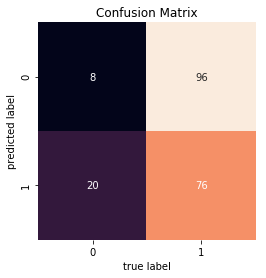

In [57]:
print('************ xorSplit: clf_Reg **************')
lucem_illud.plotConfusionMatrix(clf_Reg, dfTest_4)

************ xorSplit: clf_SVC_1 **************


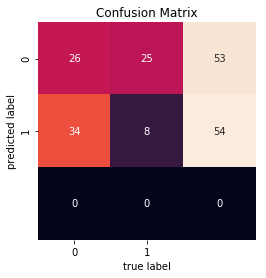

In [58]:
print('************ xorSplit: clf_DT **************')
lucem_illud.plotConfusionMatrix(clf_DT, dfTest_4)

************ xorSplit: clf_Bayes **************


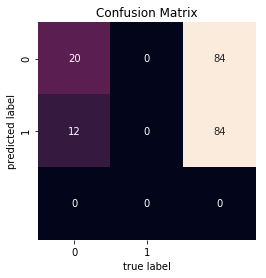

In [59]:
print('************ xorSplit: clf_Bayes **************')
lucem_illud.plotConfusionMatrix(clf_Bayes, dfTest_4)

************ xorSplit: clf_Boosting **************


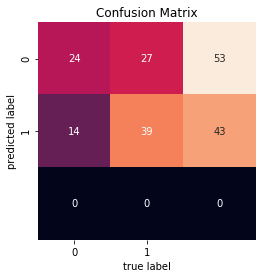

In [60]:
print('************ xorSplit: clf_Boosting **************')
lucem_illud.plotConfusionMatrix(clf_Boosting, dfTest_4)

#### <span style="color:purple"> Evaluate MultiBlobs Dataset
<span style="color:purple"> clf_SVC_1, Bayes, Boosting, Reg all perform very well

************ MultiBlobs: clf_SVC_1 **************


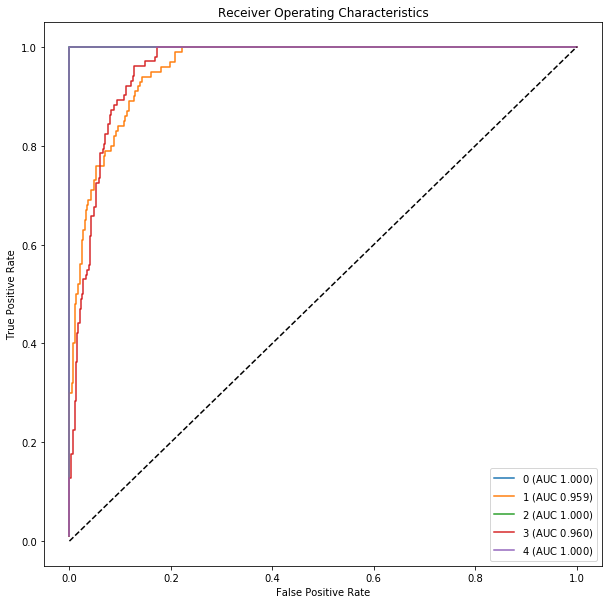

In [62]:
print('************ MultiBlobs: clf_SVC_1 **************')
lucem_illud.plotMultiROC(clf_SVC_1, dfTest_8)

************ MultiBlobs: clf_Reg **************


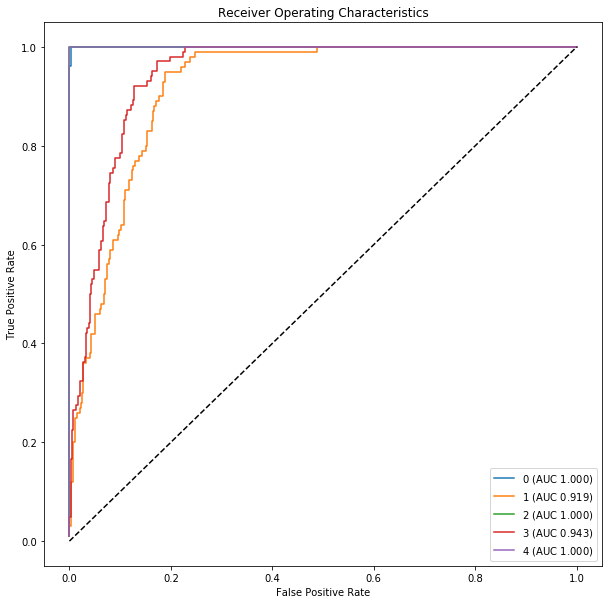

In [63]:
print('************ MultiBlobs: clf_Reg **************')
lucem_illud.plotMultiROC(clf_Reg, dfTest_8)

************ MultiBlobs: clf_SVC_1 **************


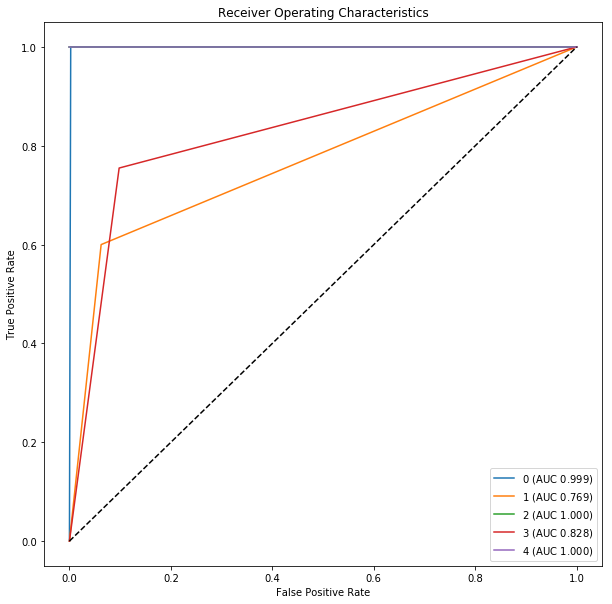

In [64]:
print('************ MultiBlobs: clf_DT **************')
lucem_illud.plotMultiROC(clf_DT, dfTest_8)

************ MultiBlobs: clf_Bayes **************


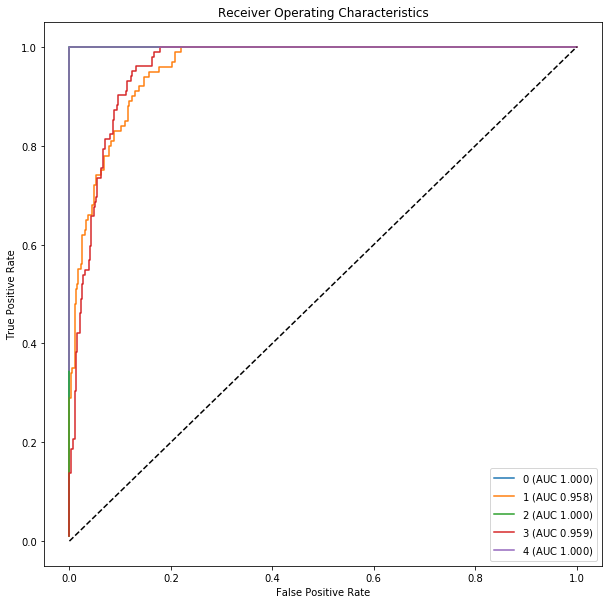

In [65]:
print('************ MultiBlobs: clf_Bayes **************')
lucem_illud.plotMultiROC(clf_Bayes, dfTest_8)

************ MultiBlobs: clf_Boosting **************


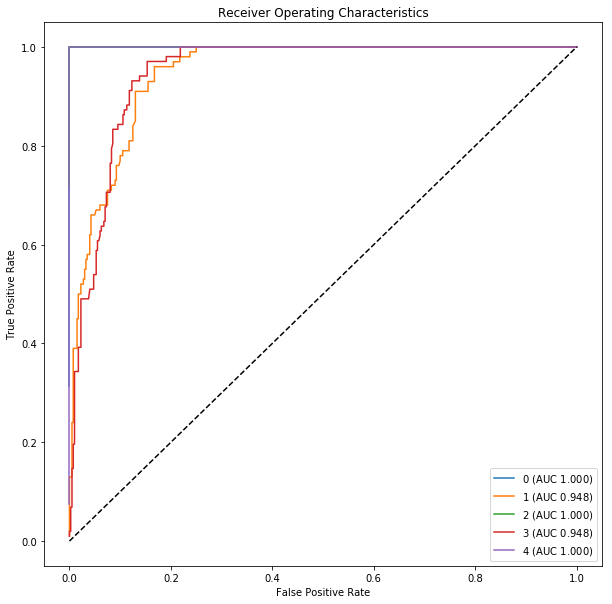

In [69]:
print('************ MultiBlobs: clf_Boosting **************')
lucem_illud.plotMultiROC(clf_Boosting, dfTest_8)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


## <span style="color:purple"> 2.1 Load Data

In [2]:
# load data
ReutersDF = pandas.read_csv('Reuters_2017News.csv')
ReutersDF.rename(columns ={'Topic': 'category'}, inplace=True)
ReutersDF[:3]
target_categories = ['economy', 'environment', 'entertainment']

# normalize
ReutersDF['tokenized_text'] = ReutersDF['News'].apply(lambda x: nltk.word_tokenize(x))
ReutersDF['normalized_text'] = ReutersDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [39]:
ReutersDF[:3]

,Unnamed: 0,Year,Month,Day,Title,category,News,Link,tokenized_text,normalized_text
0,0,2008,12,1,"Earthquake rattles Taiwan, no reports of damage",environment,Reuters Staff1 Min ReadTAIPEI (Reuters) - An e...,http://www.reuters.com/article/environmentNews...,"[Reuters, Staff1, Min, ReadTAIPEI, (, Reuters,...","[reuter, min, readtaipei, reuter, earthquak, m..."
1,1,2008,12,1,TREASURIES-Rise in Asia after Bernanke talks o...,economy,Reuters Staff3 Min Read * Treasuries edge up i...,http://www.reuters.com/article/companyNewsAndP...,"[Reuters, Staff3, Min, Read, *, Treasuries, ed...","[reuter, min, read, treasuri, edg, asia, ralli..."
2,2,2008,12,1,GLOBAL MARKETS-Asia stocks slide as global out...,economy,Reuters Staff4 Min Read * Asian shares fall 3-...,http://www.reuters.com/article/companyNewsAndP...,"[Reuters, Staff4, Min, Read, *, Asian, shares,...","[reuter, min, read, asian, share, fall, pct, w..."


## <span style="color:purple"> 2.2 Multivariate Naive Bayes

### <span style="color:purple"> 2.2.1 Train the Model

In [3]:
# split the train and test
holdBackFraction = .2
train_Reuters_B, test_Reuters_B = lucem_illud.trainTestSplit(ReutersDF, holdBackFraction=holdBackFraction)
print(len(train_Reuters_B))
print(len(test_Reuters_B))

# Train 
# (1) TF-IDF
TFVectorizer_Reuters = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_Reuters = TFVectorizer_Reuters.fit_transform(train_Reuters_B['News'])
train_Reuters_B['vect'] = [np.array(v).flatten() for v in TFVects_Reuters.todense()]

# (2) Train the model
MultinomialNB_Reuters = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_Reuters.fit(np.stack(train_Reuters_B['vect'], axis = 0), train_Reuters_B['category'])

# (3) Save testing predictions to the dataframe train_Reuters
train_Reuters_B['nb_predict_NB'] = MultinomialNB_Reuters.predict(np.stack(train_Reuters_B['vect'], axis=0))


1614
403


### <span style="color:purple"> 2.2.2 Fit/ Test the Model

In [4]:
#Create vectors
TFVects_test = TFVectorizer_Reuters.transform(test_Reuters_B['News'])
test_Reuters_B['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_Reuters_B['nb_predict_NB'] = MultinomialNB_Reuters.predict(np.stack(test_Reuters_B['vect'], axis=0))


### <span style="color:purple">2.2.3 Evaluation 
<span style="color:purple"> I will use different methods to evaluate the Multinomial Naive Bayes model.
* <span style="color:purple">Test score
* <span style="color:purple">Confusion Matrix
* <span style="color:purple">Calculate the precision, recall, and F-measures
* <span style="color:purple">Performance table
* <span style="color:purple">ROC curve

In [42]:
# (1) Test score
print("Testing score:")
print(MultinomialNB_Reuters.score(np.stack(test_Reuters_B['vect'], axis=0), test_Reuters_B['category']))

Testing score:
0.8660049627791563


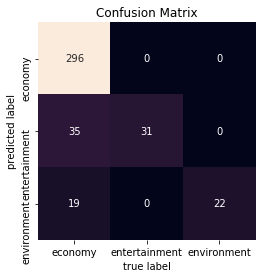

In [43]:
# (2) confusion matrix
lucem_illud.plotConfusionMatrix(MultinomialNB_Reuters, test_Reuters_B)

In [44]:
# (3) Let's calculate the precision, recall, and F-measures.
print('The precision is ', sklearn.metrics.precision_score(test_Reuters_B['nb_predict_NB'], test_Reuters_B['category'], average = 'weighted')) #precision
print('The recall is ', sklearn.metrics.recall_score(test_Reuters_B['nb_predict_NB'], test_Reuters_B['category'], average = 'weighted')) #recall
print('The F-measure is ', sklearn.metrics.f1_score(test_Reuters_B['nb_predict_NB'], test_Reuters_B['category'], average = 'weighted')) #F-1 measure

The precision is  0.9339093898495945
The recall is  0.8660049627791563
The F-measure is  0.8831824972965201


In [32]:
# (4) Performance table
lucem_illud.metrics.evaluateClassifier(MultinomialNB_Reuters, test_Reuters_B)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
environment,0.772424,0.571948,0.049628,0.958333,0.547619
economy,0.745941,0.848205,0.133995,0.848571,0.996644
entertainment,0.730159,0.544685,0.084367,1.000000,0.460317


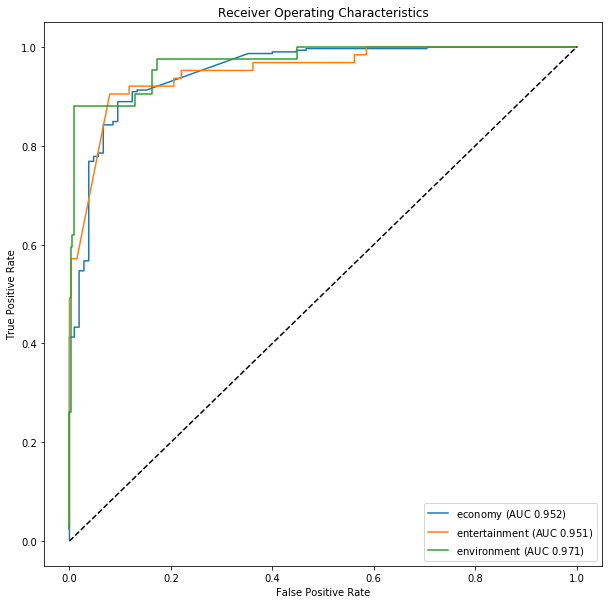

In [33]:
# ROC curve
lucem_illud.plotMultiROC(MultinomialNB_Reuters, test_Reuters_B)

## <span style="color:purple"> 2.3 Logistic Regression

### <span style="color:purple"> 2.3.1 Train the Model

In [5]:
# split the train and test
holdBackFraction = .2
train_Reuters_Reg, test_Reuters_Reg = lucem_illud.trainTestSplit(ReutersDF, holdBackFraction=holdBackFraction)
print(len(train_Reuters_Reg))
print(len(test_Reuters_Reg))

# Train 
# (1) TF-IDF
TFVectorizer_Reuters = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_Reuters = TFVectorizer_Reuters.fit_transform(train_Reuters_Reg['News'])
train_Reuters_Reg['vect'] = [np.array(v).flatten() for v in TFVects_Reuters.todense()]

# (2) Train the model
Reg_Reuters = sklearn.linear_model.LogisticRegression()
Reg_Reuters.fit(np.stack(train_Reuters_Reg['vect'], axis = 0), train_Reuters_Reg['category'])

# (3) Save testing predictions to the dataframe train_Reuters
train_Reuters_Reg['nb_predict_Reg'] = Reg_Reuters.predict(np.stack(train_Reuters_Reg['vect'], axis=0))


1614
403


### <span style="color:purple"> 2.3.2 Fit/ Test the Model

In [6]:
#Create vectors
TFVects_test = TFVectorizer_Reuters.transform(test_Reuters_Reg['News'])
test_Reuters_Reg['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_Reuters_Reg['nb_predict_Reg'] = Reg_Reuters.predict(np.stack(test_Reuters_Reg['vect'], axis=0))


### <span style="color:purple"> 2.3.3  Evaluation 
<span style="color:purple">I will use different methods to evaluate the Multinomial Naive Bayes model.
* <span style="color:purple">Test score
* <span style="color:purple">Confusion Matrix
* <span style="color:purple">Calculate the precision, recall, and F-measures
* <span style="color:purple">Performance table
* <span style="color:purple">ROC curve

In [22]:
# (1) Test score
print("Testing score:")
print(Reg_Reuters.score(np.stack(test_Reuters_Reg['vect'], axis=0), test_Reuters_Reg['category']))

Testing score:
0.8684863523573201


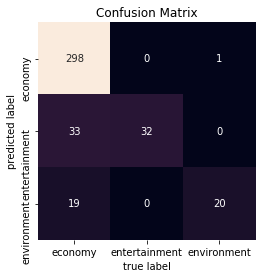

In [23]:
# (2) confusion matrix
lucem_illud.plotConfusionMatrix(Reg_Reuters, test_Reuters_Reg)

In [24]:
# (3) Let's calculate the precision, recall, and F-measures.
print('The precision is ', sklearn.metrics.precision_score(test_Reuters_Reg['nb_predict_Reg'], test_Reuters_Reg['category'], average = 'weighted')) #precision
print('The recall is ', sklearn.metrics.recall_score(test_Reuters_Reg['nb_predict_Reg'], test_Reuters_Reg['category'], average = 'weighted')) #recall
print('The F-measure is ', sklearn.metrics.f1_score(test_Reuters_Reg['nb_predict_Reg'], test_Reuters_Reg['category'], average = 'weighted')) #F-1 measure

The precision is  0.9313958023851215
The recall is  0.8684863523573201
The F-measure is  0.8846922271643121


In [25]:
# (4) Performance table
lucem_illud.metrics.evaluateClassifier(Reg_Reuters, test_Reuters_Reg)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
environment,0.755037,0.535547,0.049628,0.952381,0.512821
economy,0.748328,0.851062,0.131514,0.851429,0.996656
entertainment,0.746154,0.574194,0.081886,1.000000,0.492308


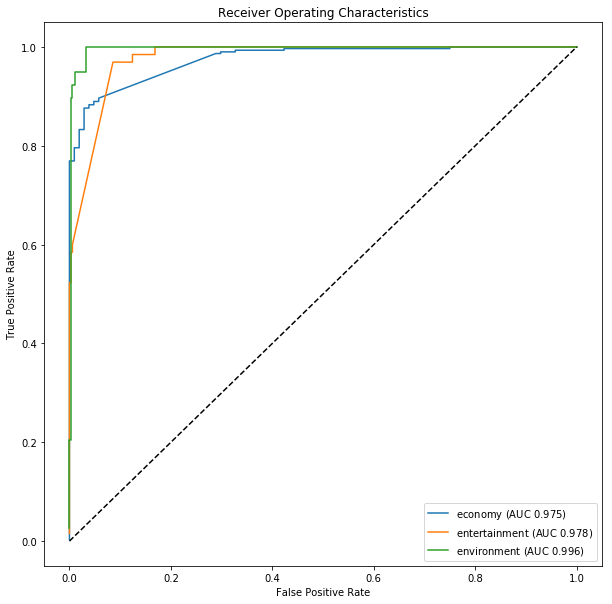

In [26]:
# ROC curve
lucem_illud.plotMultiROC(Reg_Reuters, test_Reuters_Reg)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

## <span style="color:purple"> 3.1 Decision Tree

### <span style="color:purple"> 3.1.1 Train the Model

In [7]:
# split the train and test
holdBackFraction = .2
train_Reuters_DT, test_Reuters_DT = lucem_illud.trainTestSplit(ReutersDF, holdBackFraction=holdBackFraction)
print(len(train_Reuters_DT))
print(len(test_Reuters_DT))

# Train 
# (1) TF-IDF
TFVectorizer_Reuters = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_Reuters = TFVectorizer_Reuters.fit_transform(train_Reuters_DT['News'])
train_Reuters_DT['vect'] = [np.array(v).flatten() for v in TFVects_Reuters.todense()]

# (2) Train the model
DT_Reuters = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
DT_Reuters.fit(np.stack(train_Reuters_DT['vect'], axis = 0), train_Reuters_DT['category'])

# (3) Save testing predictions to the dataframe train_Reuters
train_Reuters_DT['nb_predict_DT'] = DT_Reuters.predict(np.stack(train_Reuters_DT['vect'], axis=0))


1614
403


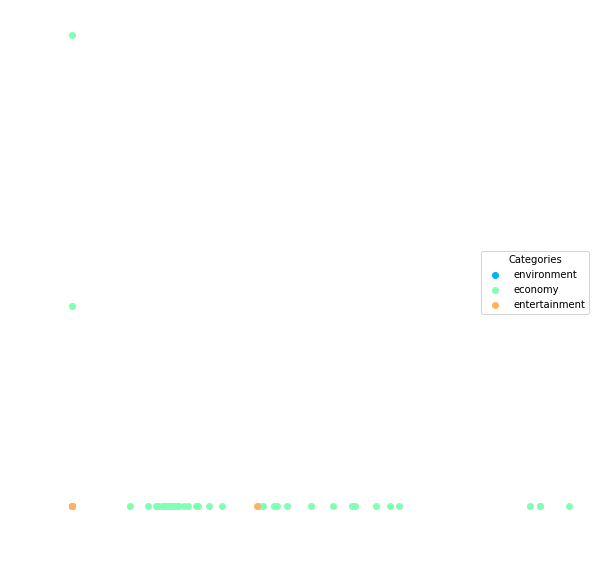

In [13]:
lucem_illud.plotter(train_Reuters_DT)

### <span style="color:purple"> 3.1.2 Fit/ Test the Model

In [8]:
#Create vectors
TFVects_test = TFVectorizer_Reuters.transform(test_Reuters_DT['News'])
test_Reuters_DT['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_Reuters_DT['nb_predict_DT'] = DT_Reuters.predict(np.stack(test_Reuters_DT['vect'], axis=0))


### <span style="color:purple"> 3.1.3  Evaluation 

In [15]:
lucem_illud.evaluateClassifier(DT_Reuters, test_Reuters_DT)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
environment,0.821189,0.583325,0.052109,0.828571,0.659091
economy,0.745921,0.828318,0.156328,0.830861,0.979021
entertainment,0.712329,0.528876,0.104218,1.000000,0.424658


In [16]:
a = sklearn.metrics.accuracy_score(test_Reuters_DT['category'],DT_Reuters.predict(np.stack(test_Reuters_DT['vect'], axis = 0)))
print('The accuracy rate is ', a)

The accuracy rate is  0.8436724565756824


### <span style="color:purple"> 3.1.4 Trim the tree

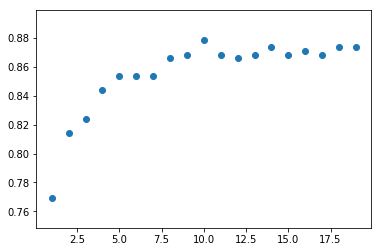

In [17]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_Reuters_DT['vect'], axis =0), train_Reuters_DT['category'])
    score = sklearn.metrics.accuracy_score(test_Reuters_DT['category'], tree2.predict(np.stack(test_Reuters_DT['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

## <span style="color:purple">  3.2 Random Forest

In [18]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=7) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

bag.fit(np.stack(train_Reuters_DT['vect'], axis =0), train_Reuters_DT['category']) #Fit the bagged classifier


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [19]:
lucem_illud.evaluateClassifier(bag, test_Reuters_DT)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
environment,0.843916,0.622553,0.047146,0.837838,0.704545
economy,0.784382,0.850638,0.133995,0.853659,0.979021
entertainment,0.751910,0.582841,0.091811,0.973684,0.506849


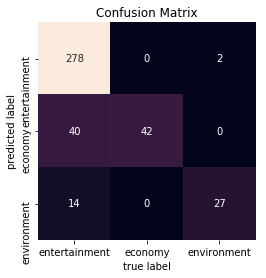

In [18]:
lucem_illud.plotConfusionMatrix(bag, test_Reuters_DT)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

## <span style="color:purple">  4 K-Nearest Neighbor

### <span style="color:purple"> 4.1 Train the Model

In [ ]:
holdBackFraction = .2
train_Reuters_K, test_Reuters_K = lucem_illud.trainTestSplit(ReutersDF, holdBackFraction=holdBackFraction)

n_neighbors = 3
weights="uniform"


# Train 
# (1) TF-IDF
TFVectorizer_Reuters = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_Reuters = TFVectorizer_Reuters.fit_transform(train_Reuters_K['News'])
train_Reuters_K['vect'] = [np.array(v).flatten() for v in TFVects_Reuters.todense()]

# (2) Train the model
K_Reuters = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
K_Reuters.fit(np.stack(train_Reuters_K['vect'], axis = 0), train_Reuters_K['category'])

# (3) Save testing predictions to the dataframe train_Reuters
train_Reuters_K['nb_predict_K'] = K_Reuters.predict(np.stack(train_Reuters_K['vect'], axis=0))



### <span style="color:purple"> 4.2 Fit/ Test the Model

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_Reuters.transform(test_Reuters_K['News'])
test_Reuters_K['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_Reuters_K['nb_predict_K'] = K_Reuters.predict(np.stack(test_Reuters_K['vect'], axis=0))


### <span style="color:purple"> 4.3  Evaluation 

In [26]:
# (1) Test score
print("Testing score:")
print(K_Reuters.score(np.stack(test_Reuters_K['vect'], axis=0), test_Reuters_K['category']))

Testing score:
0.6178660049627791


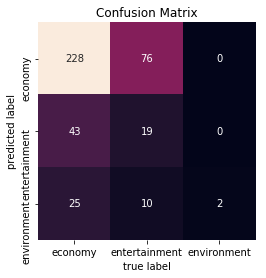

In [27]:
# (2) confusion matrix
lucem_illud.plotConfusionMatrix(K_Reuters, test_Reuters_K)

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

## <span style="color:purple"> 5.1 SVMs

### <span style="color:purple"> 5.1.1 Train the Model

In [ ]:
holdBackFraction = .2
train_Reuters_SVM, test_Reuters_SVM = lucem_illud.trainTestSplit(ReutersDF, holdBackFraction=holdBackFraction)

# Train 
# (1) TF-IDF
TFVectorizer_Reuters = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_Reuters = TFVectorizer_Reuters.fit_transform(train_Reuters_SVM['News'])
train_Reuters_SVM['vect'] = [np.array(v).flatten() for v in TFVects_Reuters.todense()]

# (2) Train the model
SVM_Reuters = sklearn.svm.SVC(kernel='linear', probability = False)
SVM_Reuters.fit(np.stack(train_Reuters_SVM['vect'], axis = 0), train_Reuters_SVM['category'])

# (3) Save testing predictions to the dataframe train_Reuters
train_Reuters_SVM['nb_predict_SVM'] = SVM_Reuters.predict(np.stack(train_Reuters_SVM['vect'], axis=0))



### <span style="color:purple"> 5.1.2 Fit/ Test the Model

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_Reuters.transform(test_Reuters_SVM['News'])
test_Reuters_SVM['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_Reuters_SVM['nb_predict_SVM'] = SVM_Reuters.predict(np.stack(test_Reuters_SVM['vect'], axis=0))


### <span style="color:purple"> 5.1.3  Evaluation 

In [17]:
# (1) Test score
print("Testing score:")
print(SVM_Reuters.score(np.stack(test_Reuters_SVM['vect'], axis=0), test_Reuters_SVM['category']))

Testing score:
0.890818858560794


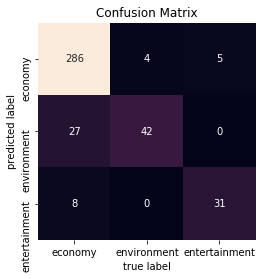

In [18]:
# (2) confusion matrix
lucem_illud.plotConfusionMatrix(SVM_Reuters, test_Reuters_SVM)

## <span style="color:purple">  5.2 Neural Nets

### <span style="color:purple"> 5.2.1 Train the Model

In [4]:
# MLP -- Multi-layer Percepron
holdBackFraction = .2
train_Reuters_MLP, test_Reuters_MLP = lucem_illud.trainTestSplit(ReutersDF, holdBackFraction=holdBackFraction)

# Train 
# (1) TF-IDF
TFVectorizer_Reuters = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_Reuters = TFVectorizer_Reuters.fit_transform(train_Reuters_MLP['News'])
train_Reuters_MLP['vect'] = [np.array(v).flatten() for v in TFVects_Reuters.todense()]

# (2) Train the model
MLP_Reuters = sklearn.neural_network.MLPClassifier()
MLP_Reuters.fit(np.stack(train_Reuters_MLP['vect'], axis = 0), train_Reuters_MLP['category'])

# (3) Save testing predictions to the dataframe train_Reuters
train_Reuters_MLP['nb_predict_MLP'] = MLP_Reuters.predict(np.stack(train_Reuters_MLP['vect'], axis=0))



### <span style="color:purple"> 5.2.2 Fit/ Test the Model

In [5]:
#Create vectors
TFVects_test = TFVectorizer_Reuters.transform(test_Reuters_MLP['News'])
test_Reuters_MLP['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_Reuters_MLP['nb_predict_MLP'] = MLP_Reuters.predict(np.stack(test_Reuters_MLP['vect'], axis=0))


### <span style="color:purple"> 5.2.3  Evaluation 

In [10]:
# (1) Test score
print("Testing score:")
print(MLP_Reuters.score(np.stack(test_Reuters_MLP['vect'], axis=0), test_Reuters_MLP['category']))

Testing score:
0.9032258064516129


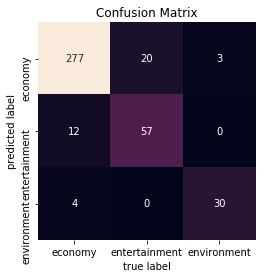

In [11]:
# (2) confusion matrix
lucem_illud.plotConfusionMatrix(MLP_Reuters, test_Reuters_MLP)

## Some Extra Visualization

In [37]:
train_R[:3]

,Unnamed: 0,Year,Month,Day,Title,category,News,Link,tokenized_text,normalized_text,vect,nb_predict_NB,C,NB,Reg
887,887,2008,12,9,"UPDATE 2-Liberals win Quebec election, beat se...",economy,"Reuters Staff4 Min Read (Adds results, reactio...",http://www.reuters.com/article/companyNewsAndP...,"[Reuters, Staff4, Min, Read, (, Adds, results,...","[reuter, min, read, add, result, reaction, spe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",economy,0,0,NaN
1244,1244,2008,12,12,Opel staff could take stake in company-report,economy,"Reuters Staff2 Min Read FRANKFURT, Dec 12 (Reu...",http://www.reuters.com/article/privateEquityCo...,"[Reuters, Staff2, Min, Read, FRANKFURT, ,, Dec...","[reuter, min, read, frankfurt, dec, reuter, wo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",economy,0,0,economy
1420,1420,2008,12,15,"Gold rises on weaker dollar, equity rally",economy,4 Min ReadLONDON (Reuters) - Gold climbed in E...,http://www.reuters.com/article/globalMarketsNe...,"[4, Min, ReadLONDON, (, Reuters, ), -, Gold, c...","[min, readlondon, reuter, gold, climb, europ, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",economy,0,0,economy


In [15]:
train_R = train_Reuters_B

# true categories
train_R['C']=train_Reuters_B['category']
train_R.loc[train_R.category == 'economy', 'C'] = 0
train_R.loc[train_R.category == 'entertainment', 'C'] = 1
train_R.loc[train_R.category == 'environment', 'C'] = 2

# Bayes predictions
train_R['NB']=train_Reuters_B['nb_predict_NB']
train_R.loc[train_R.NB == 'economy', 'NB'] = 0
train_R.loc[train_R.NB == 'entertainment', 'NB'] = 1
train_R.loc[train_R.NB == 'environment', 'NB'] = 2

# Logistic Regression predicitons
train_R['Reg']=train_Reuters_Reg['nb_predict_Reg']
train_R.loc[train_R.Reg == 'economy', 'Reg'] = 0
train_R.loc[train_R.Reg == 'entertainment', 'Reg'] = 1
train_R.loc[train_R.Reg == 'environment', 'Reg'] = 2

# Decision Tree predictions
train_R['DT']=train_Reuters_DT['nb_predict_DT']
train_R.loc[train_R.DT == 'economy', 'DT'] = 0
train_R.loc[train_R.DT == 'entertainment', 'DT'] = 1
train_R.loc[train_R.DT == 'environment', 'DT'] = 2

# K-nearest neighbor predictions
train_R['K']=train_Reuters_K['nb_predict_K']
train_R.loc[train_R.K == 'economy', 'K'] = 0
train_R.loc[train_R.K == 'entertainment', 'K'] = 1
train_R.loc[train_R.K == 'environment', 'K'] = 2

# SVM predictions
train_R['SVM']=train_Reuters_SVM['nb_predict_SVM']
train_R.loc[train_R.SVM == 'economy', 'SVM'] = 0
train_R.loc[train_R.SVM == 'entertainment', 'SVM'] = 1
train_R.loc[train_R.SVM == 'environment', 'SVM'] = 2

colordict = {
'economy': 'orange',
'environment': 'green',
'entertainment': 'blue'}


NameError: name 'train_Reuters_SVM' is not defined